In [1]:
#import libraries
import pandas as pd
# import seaborn as sns
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from collections import Counter

In [2]:
#import data and view
df = pd.read_csv("../db/cdv_FeatureSet_updated.csv", skipinitialspace=True)
df

,apk_name,u_battery-status,u_camera,u_contacts,u_device,u_dialogs,u_file,u_geolocation,u_globalization,u_inappbrowser,...,android.permission.CHANGE_CONFIGURATION,android.permission.PACKAGE_USAGE_STATS,android.permission.SYSTEM_ALERT_WINDOW,android.permission.HIDE_OVERLAY_WINDOWS,dangerous,deprecated,normal,Not for use by third-party applications.,signature,class
0,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,2,0,4,0,0,1
1,10,1,0,0,1,0,1,1,0,0,...,0,0,0,0,8,0,5,0,0,1
2,100,1,0,0,1,1,1,1,0,0,...,0,0,0,0,5,0,5,0,0,0
3,101,1,1,1,1,1,1,1,0,0,...,0,0,0,0,6,0,2,0,0,0
4,102,1,1,1,1,1,1,1,1,0,...,0,0,0,0,1,1,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,za.co.snapplify.completecookery,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,1,5,0,1,0
2654,za.co.snapplify.garfield,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,1,5,0,1,0
2655,za.co.snapplify.lowveldliving,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,1,5,0,1,0
2656,za.co.snapplify.purpleturtle,1,0,0,1,0,1,0,0,0,...,0,0,0,0,1,1,5,0,1,0


In [3]:
# df_pro = data_origin.drop(columns=["apk_name"])
# df_pro

# Model

In [4]:
# import model training class from data_scikit_cv
from data_scikit_cv import ModelsTraining 
label = "class"  # column for label
drop_cols = ["apk_name"]  # irrelavent columns
df_models = ModelsTraining(df, label, drop_cols)

10-fold Cross Validation


======================================== 1/6 Naive Bayesian ========================================
Training model...

accuracy_scores:
 [0.38028169 0.37558685 0.39906103 0.40375587 0.38967136 0.37089202
 0.40566038 0.39622642 0.36792453 0.38679245]
f1_scores:
 [0.53846154 0.53658537 0.55244755 0.55123675 0.54545455 0.53472222
 0.55       0.54929577 0.53146853 0.54545455]
The mean accuracy: 0.388
The mean f1 score: 0.544


              precision    recall  f1-score   support

           0       0.03      1.00      0.06        11
           1       1.00      0.35      0.52       521

    accuracy                           0.36       532
   macro avg       0.52      0.67      0.29       532
weighted avg       0.98      0.36      0.51       532



=================================== 2/6 Decision Tree Classifier ===================================
Training model...

accuracy_scores:
 [0.69953052 0.69483568 0.72769953 0.71830986 0.74178404 0.74647887
 0.74056604

In [5]:
# Split data
X = df_models.X
y = df_models.y
X_test = df_models.X_test
y_test = df_models.y_test
y_pred_ls = df_models.y_pred_ls
model_ls = df_models.model_ls

# Result Visualization

## Consfusion Matrix for the Classifier 

<Figure size 360x360 with 0 Axes>

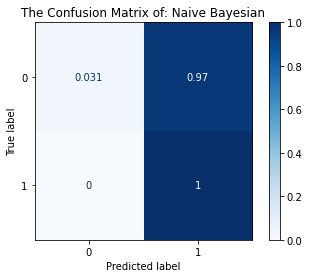

<Figure size 360x360 with 0 Axes>

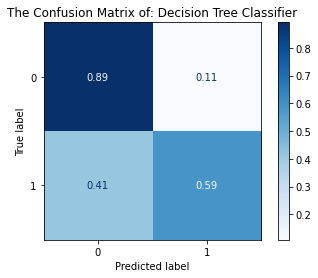

<Figure size 360x360 with 0 Axes>

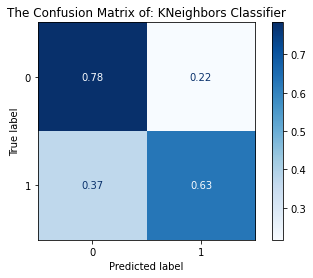

<Figure size 360x360 with 0 Axes>

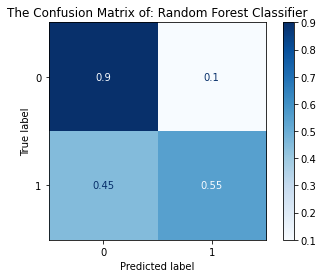

<Figure size 360x360 with 0 Axes>

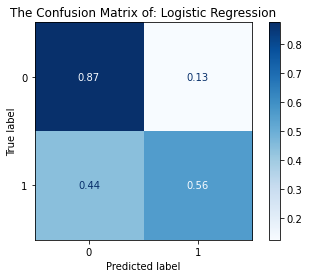

<Figure size 360x360 with 0 Axes>

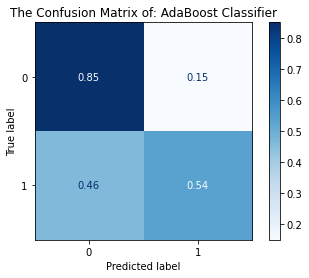

In [6]:
from sklearn.metrics import plot_confusion_matrix
for name, clf in model_ls.items():
#     print ("The Confusion Matrix of: ", name)
#     print (pd.DataFrame(confusion_matrix(y_test, y_pred)))
    plt.figure(figsize=(5,5))
    disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
    disp.ax_.set_title("The Confusion Matrix of: %s" % name)
    plt.show()

In [7]:
# df_models.confusion_matrix_visualization()
accuracy_f1 = df_models.accuracy_f1()
accuracy_f1.style.background_gradient(cmap='Blues')

,ML Models,Accuracy,F1-score
0,Naive Bayesian,0.387585,0.543513
1,Decision Tree Classifier,0.730977,0.608922
2,KNeighbors Classifier,0.727164,0.631321
3,Random Forest Classifier,0.780075,0.628571
4,Logistic Regression,0.750246,0.616556
5,AdaBoost Classifier,0.754945,0.620710


## ROC Curve

In [8]:
# df_models.accuracy_f1()

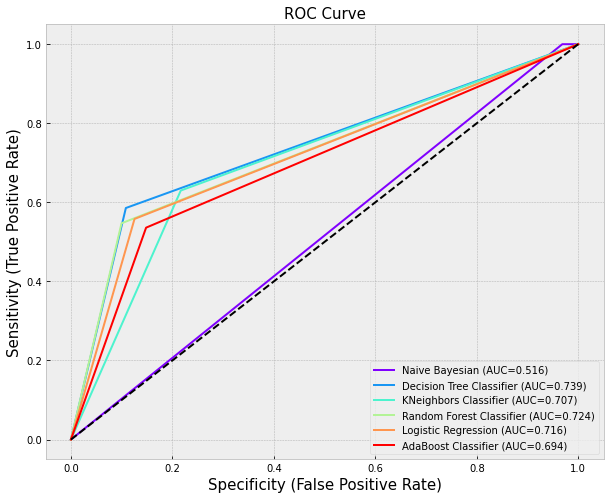

In [9]:
# ROC Curve for the classification models

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from numpy import interp

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")
color = cm.rainbow(np.linspace(0, 1, len(model_ls)))
plt.title("ROC Curve", fontsize = 15)
plt.xlabel("Specificity (False Positive Rate)", fontsize = 15)
plt.ylabel("Sensitivity (True Positive Rate)", fontsize = 15)
labels = list()


# Plot ROC Curve
for c, (name, y_pred) in enumerate(y_pred_ls.items()):
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color[c])
    labels.append('{} (AUC={:.3f})'.format(name, roc_auc))
  
plt.gca().legend(labels, loc='lower right', frameon=True)    
plt.plot([0,1],[0,1], linestyle='--', color='black')
plt.show()

## Learning Curve

In [10]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import ShuffleSplit

# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                         n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt


# for name, model in model_ls.items():
#     title = "Learning Curves for " + name
#     cv=None
# #     cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#     plot_learning_curve(model, title, X, y, ylim=(0.2, 1.01), n_jobs=4)
#     plt.show()